# Notebook Imports

In [1]:
# Import Pandas as Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from config import protocol, username, password, host, port, database_name


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

# Connect to AWS Server

In [2]:
# Connect to postgres database
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

# Supervised Machine Learning with First Dataframe (71,782 rows)
* Since our dataset is a labeled (LAhalfand10) dataset and has two class labels (0 and 1), we are using binary classification supervised machine learning models

## Load Data

In [3]:
# First dataframe
df1 = pd.read_sql_query('select * from food_access_1', engine)
df1.tail()

CensusTract StateFIPS    State           County  Urban  Pop2010  \
71777  56043000200        56  Wyoming  Washakie County      0     3326   
71778  56043000301        56  Wyoming  Washakie County      1     2665   
71779  56043000302        56  Wyoming  Washakie County      1     2542   
71780  56045951100        56  Wyoming    Weston County      0     3314   
71781  56045951300        56  Wyoming    Weston County      1     3894   

       OHU2010  PovertyRate  MedianFamilyIncome  LAhalfand10  ...  \
71777     1317          9.7             67254.0            1  ...   
71778     1154         11.6             64152.0            1  ...   
71779     1021         16.3             69605.0            1  ...   
71780     1322         17.5             74500.0            1  ...   
71781     1699         17.3             76838.0            1  ...   

       TractSeniors_PCT  TractWhite_PCT  TractBlack_PCT  TractAsian_PCT  \
71777             17.83           93.39            0.18            0.45   
71778             14.97           89.19            0.19            0.86   
71779             20.30           90.95            0.43            0.39   
71780             15.06           95.93            0.45            0.30   
71781             16.69           95.17            0.15            0.26   

       TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  TractHispanic_PCT  \
71777            0.00           0.81              5.17               9.29   
71778            0.00           1.50              8.26              16.74   
71779            0.04           1.02              7.16              16.01   
71780            0.03           1.42              1.87               2.75   
71781            0.05           1.13              3.24               3.21   

       TractHUNV_PCT  TractSNAP_PCT  
71777           4.63           4.86  
71778           7.63           3.55  
71779           2.25           6.27  
71780           3.56           2.57  
71781           2.00           6.47  

[5 rows x 34 columns]

## Preprocessing Data

In [4]:
# Calculate population / # of households in order to create a new column
df1['Pop_per_household'] = df1['Pop2010']/df1['OHU2010']
df1.head()

CensusTract StateFIPS    State          County  Urban  Pop2010  OHU2010  \
0  01001020100        01  Alabama  Autauga County      1     1912      693   
1  01001020200        01  Alabama  Autauga County      1     2170      743   
2  01001020300        01  Alabama  Autauga County      1     3373     1256   
3  01001020400        01  Alabama  Autauga County      1     4386     1722   
4  01001020500        01  Alabama  Autauga County      1    10766     4082   

   PovertyRate  MedianFamilyIncome  LAhalfand10  ...  TractWhite_PCT  \
0         11.3             81250.0            1  ...           84.83   
1         17.9             49000.0            1  ...           40.92   
2         15.0             62609.0            1  ...           76.37   
3          2.8             70607.0            1  ...           93.16   
4         15.2             96334.0            1  ...           80.49   

   TractBlack_PCT  TractAsian_PCT  TractNHOPI_PCT  TractAIAN_PCT  \
0           11.35            0.73            0.00           0.73   
1           56.08            0.23            0.00           0.23   
2           19.18            0.50            0.15           0.33   
3            4.40            0.41            0.09           0.25   
4           13.35            2.75            0.08           0.45   

   TractOMultir_PCT  TractHispanic_PCT  TractHUNV_PCT  TractSNAP_PCT  \
0              2.35               2.30           0.87          14.72   
1              2.53               3.46          11.98          21.00   
2              3.47               2.58           7.88          13.69   
3              1.69               1.94           1.22           5.69   
4              2.88               3.30           5.63           8.30   

   Pop_per_household  
0           2.759019  
1           2.920592  
2           2.685510  
3           2.547038  
4           2.637433  

[5 rows x 35 columns]

In [5]:
# Drop columns that don't contribute to the model
df1= df1.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
df1.head()

PovertyRate  MedianFamilyIncome  LAhalfand10  TractLOWI_PCT  TractKids_PCT  \
0         11.3             81250.0            1          23.80          26.52   
1         17.9             49000.0            1          36.96          27.93   
2         15.0             62609.0            1          38.72          26.50   
3          2.8             70607.0            1          21.02          23.14   
4         15.2             96334.0            1          20.82          29.37   

   TractSeniors_PCT  TractWhite_PCT  TractBlack_PCT  TractAsian_PCT  \
0             11.56           84.83           11.35            0.73   
1              9.86           40.92           56.08            0.23   
2             13.02           76.37           19.18            0.50   
3             20.61           93.16            4.40            0.41   
4             10.46           80.49           13.35            2.75   

   TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  TractHispanic_PCT  \
0            0.00           0.73              2.35               2.30   
1            0.00           0.23              2.53               3.46   
2            0.15           0.33              3.47               2.58   
3            0.09           0.25              1.69               1.94   
4            0.08           0.45              2.88               3.30   

   TractHUNV_PCT  TractSNAP_PCT  Pop_per_household  
0           0.87          14.72           2.759019  
1          11.98          21.00           2.920592  
2           7.88          13.69           2.685510  
3           1.22           5.69           2.547038  
4           5.63           8.30           2.637433

In [6]:
# Move the target column to the last
cols = list(df1.columns.values)
cols.pop(cols.index('LAhalfand10')) 
df1 = df1[cols+['LAhalfand10']]
df1.head()

PovertyRate  MedianFamilyIncome  TractLOWI_PCT  TractKids_PCT  \
0         11.3             81250.0          23.80          26.52   
1         17.9             49000.0          36.96          27.93   
2         15.0             62609.0          38.72          26.50   
3          2.8             70607.0          21.02          23.14   
4         15.2             96334.0          20.82          29.37   

   TractSeniors_PCT  TractWhite_PCT  TractBlack_PCT  TractAsian_PCT  \
0             11.56           84.83           11.35            0.73   
1              9.86           40.92           56.08            0.23   
2             13.02           76.37           19.18            0.50   
3             20.61           93.16            4.40            0.41   
4             10.46           80.49           13.35            2.75   

   TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  TractHispanic_PCT  \
0            0.00           0.73              2.35               2.30   
1            0.00           0.23              2.53               3.46   
2            0.15           0.33              3.47               2.58   
3            0.09           0.25              1.69               1.94   
4            0.08           0.45              2.88               3.30   

   TractHUNV_PCT  TractSNAP_PCT  Pop_per_household  LAhalfand10  
0           0.87          14.72           2.759019            1  
1          11.98          21.00           2.920592            1  
2           7.88          13.69           2.685510            1  
3           1.22           5.69           2.547038            1  
4           5.63           8.30           2.637433            1

In [7]:
# Check for null values
df1.isnull().sum()

PovertyRate           0
MedianFamilyIncome    0
TractLOWI_PCT         0
TractKids_PCT         0
TractSeniors_PCT      0
TractWhite_PCT        0
TractBlack_PCT        0
TractAsian_PCT        0
TractNHOPI_PCT        0
TractAIAN_PCT         0
TractOMultir_PCT      0
TractHispanic_PCT     0
TractHUNV_PCT         0
TractSNAP_PCT         0
Pop_per_household     0
LAhalfand10           0
dtype: int64

In [8]:
# Check for duplicate values 
df1.duplicated().sum()

0

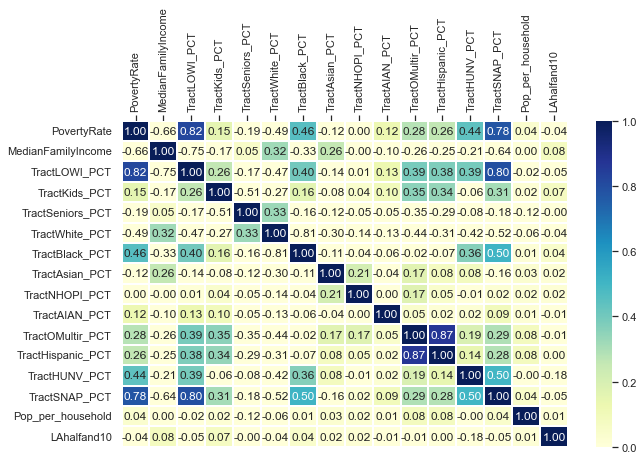

In [9]:
# Check coorelation coefficient of feature in df 
corrM = df1.corr()
  
# Create a heatmap for all parameter correlation values
sns.set(style="white",font_scale=1)
plt.figure(figsize = (10,6))
ax=sns.heatmap(corrM, cmap="YlGnBu", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [10]:
# Define features and target
X = df1.drop('LAhalfand10', axis=1)
y = df1['LAhalfand10']

# Scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testing Various Binary Classification Models: Model, Fit, Predict

In [11]:
# Create models
models = [
    LogisticRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier()
    
]


In [12]:
# Fit and Pedict models
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)       
    print(model)
    print(f'Training Score: {model.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {model.score(X_test_scaled, y_test)}')
    print()   
      

LogisticRegression()
Training Score: 0.704862917007207
Testing Score: 0.706452691407556

Lasso()
Training Score: 0.0
Testing Score: -3.8758508688729876e-05

Ridge()
Training Score: 0.062360117996025144
Testing Score: 0.06697101151080731

ElasticNet()
Training Score: 0.0
Testing Score: -3.8758508688729876e-05

KNeighborsClassifier()
Training Score: 0.8129690170146371
Testing Score: 0.7360414577064527

GaussianNB()
Training Score: 0.6465190578794858
Testing Score: 0.6479995542182102

SVC()
Training Score: 0.7652314436436585
Testing Score: 0.7616181878970244

DecisionTreeClassifier()
Training Score: 1.0
Testing Score: 0.6868940153794717

AdaBoostClassifier()
Training Score: 0.7478267330410877
Testing Score: 0.7485233478212415

RandomForestClassifier()
Training Score: 1.0
Testing Score: 0.7788922322523125



In [13]:
# Get the complete score card for Random Forest Classifier model
clf = RandomForestClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f'Training Score: {model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.71      0.50      0.58      5645
           1       0.80      0.91      0.85     12301

    accuracy                           0.78     17946
   macro avg       0.75      0.70      0.72     17946
weighted avg       0.77      0.78      0.76     17946

Training Score: 1.0
Testing Score: 0.7788922322523125


# Model Optimization

## Feature Selection

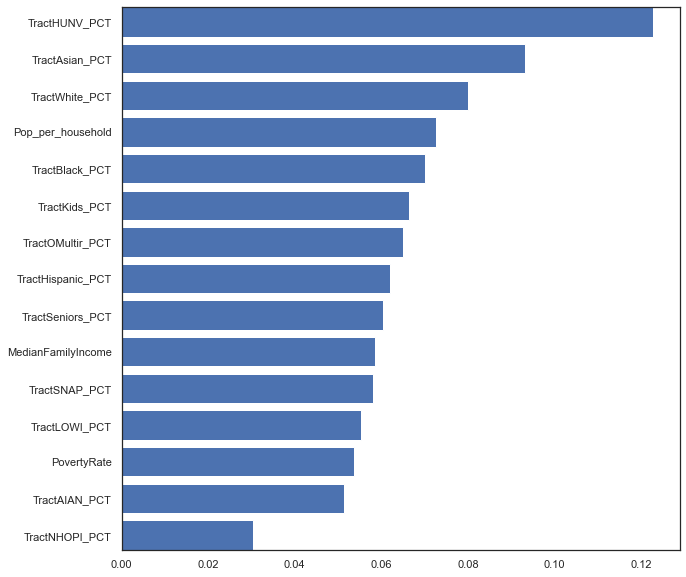

In [14]:
# Create Random Forest Classifier model
clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [15]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.64      0.47      0.55      5681
           1       0.78      0.88      0.83     12265

    accuracy                           0.75     17946
   macro avg       0.71      0.68      0.69     17946
weighted avg       0.74      0.75      0.74     17946

Training Score: 0.9999814250687272
Testing Score: 0.7505850885991308


## Hyperparameter Tuning with GridSearchCV

In [16]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Create a base model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [17]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')

{'max_depth': 7, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.71      0.39      0.50      5681
           1       0.77      0.93      0.84     12265

    accuracy                           0.76     17946
   macro avg       0.74      0.66      0.67     17946
weighted avg       0.75      0.76      0.73     17946

Training Score: 0.7615536072516532
Testing Score: 0.756435974590438


# Random Forest Classifier with Second Dataframe (7,708 rows)
* This dataframe was created by adding 26 more features to first dataframe (as part of model optimization) but resulted into a much smaller dataframe due to excessive null values.

## Load Data

In [18]:
# Second dataframe
df2 = pd.read_sql_query('select * from food_access_2', engine)
df2.tail()

CensusTract StateFIPS    State           County  Urban  Pop2010  \
7703  56041975200        56  Wyoming     Uinta County      0     6505   
7704  56041975300        56  Wyoming     Uinta County      0     7761   
7705  56041975400        56  Wyoming     Uinta County      0     6852   
7706  56043000200        56  Wyoming  Washakie County      0     3326   
7707  56045951100        56  Wyoming    Weston County      0     3314   

      OHU2010  PovertyRate  MedianFamilyIncome  LAhalfand10  ...  \
7703     2340          6.4             91350.0            0  ...   
7704     2696         13.6             62445.0            0  ...   
7705     2632         17.3             57248.0            0  ...   
7706     1317          9.7             67254.0            1  ...   
7707     1322         17.5             74500.0            1  ...   

      TractSeniors_PCT  TractWhite_PCT  TractBlack_PCT  TractAsian_PCT  \
7703              9.16           96.88            0.22            0.20   
7704              7.33           90.86            0.27            0.37   
7705             10.35           89.90            0.29            0.28   
7706             17.83           93.39            0.18            0.45   
7707             15.06           95.93            0.45            0.30   

      TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  TractHispanic_PCT  \
7703            0.17           0.57              1.97               2.87   
7704            0.30           0.82              7.37              10.27   
7705            0.03           0.98              8.52              12.71   
7706            0.00           0.81              5.17               9.29   
7707            0.03           1.42              1.87               2.75   

      TractHUNV_PCT  TractSNAP_PCT  
7703           3.03           3.46  
7704           3.97           9.46  
7705           4.71           8.24  
7706           4.63           4.86  
7707           3.56           2.57  

[5 rows x 60 columns]

# Preprocess Data

In [19]:
# Calculate population / # of households in order to create a new column
df2['Pop_per_household'] = df2['Pop2010']/df2['OHU2010']
df2.head()

CensusTract StateFIPS    State          County  Urban  Pop2010  OHU2010  \
0  01001020801        01  Alabama  Autauga County      0     3081     1074   
1  01001020802        01  Alabama  Autauga County      0    10435     3694   
2  01001020900        01  Alabama  Autauga County      0     5675     2067   
3  01001021000        01  Alabama  Autauga County      0     2894     1085   
4  01001021100        01  Alabama  Autauga County      0     3320     1306   

   PovertyRate  MedianFamilyIncome  LAhalfand10  ...  TractWhite_PCT  \
0          8.9             89423.0            0  ...           87.31   
1         13.7             84833.0            0  ...           83.79   
2          9.8             77865.0            0  ...           85.20   
3         22.7             60900.0            1  ...           76.81   
4         24.1             49833.0            1  ...           43.40   

   TractBlack_PCT  TractAsian_PCT  TractNHOPI_PCT  TractAIAN_PCT  \
0            9.02            0.52            0.00           0.88   
1           13.29            0.58            0.07           0.47   
2           11.96            0.35            0.05           0.25   
3           20.84            0.10            0.00           0.62   
4           54.52            0.06            0.00           0.42   

   TractOMultir_PCT  TractHispanic_PCT  TractHUNV_PCT  TractSNAP_PCT  \
0              2.27               1.85           6.33          13.31   
1              1.79               1.52           5.36           9.53   
2              2.19               1.69           4.69          16.45   
3              1.62               1.35           0.83          13.46   
4              1.60               1.17          20.60          17.61   

   Pop_per_household  
0           2.868715  
1           2.824851  
2           2.745525  
3           2.667281  
4           2.542113  

[5 rows x 61 columns]

In [20]:
# Drop columns that don't contribute to the model
df2= df2.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
df2.head()

PovertyRate  MedianFamilyIncome  LAhalfand10  lapophalfshare  \
0          8.9             89423.0            0          100.00   
1         13.7             84833.0            0           99.00   
2          9.8             77865.0            0           97.79   
3         22.7             60900.0            1          100.00   
4         24.1             49833.0            1          100.00   

   lalowihalfshare  lakidshalfshare  laseniorshalfshare  lawhitehalfshare  \
0            18.70            26.45               11.07             87.31   
1            26.67            27.63               10.06             82.85   
2            23.42            26.04               10.86             83.16   
3            38.67            25.92               11.99             76.81   
4            51.75            22.59               14.85             43.40   

   lablackhalfshare  laasianhalfshare  ...  TractWhite_PCT  TractBlack_PCT  \
0              9.02              0.52  ...           87.31            9.02   
1             13.25              0.58  ...           83.79           13.29   
2             11.95              0.34  ...           85.20           11.96   
3             20.84              0.10  ...           76.81           20.84   
4             54.52              0.06  ...           43.40           54.52   

   TractAsian_PCT  TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  \
0            0.52            0.00           0.88              2.27   
1            0.58            0.07           0.47              1.79   
2            0.35            0.05           0.25              2.19   
3            0.10            0.00           0.62              1.62   
4            0.06            0.00           0.42              1.60   

   TractHispanic_PCT  TractHUNV_PCT  TractSNAP_PCT  Pop_per_household  
0               1.85           6.33          13.31           2.868715  
1               1.52           5.36           9.53           2.824851  
2               1.69           4.69          16.45           2.745525  
3               1.35           0.83          13.46           2.667281  
4               1.17          20.60          17.61           2.542113  

[5 rows x 42 columns]

In [21]:
# Move the target column to the last
cols = list(df2.columns.values)
cols.pop(cols.index('LAhalfand10')) 
df2 = df2[cols+['LAhalfand10']]
df2.head()

PovertyRate  MedianFamilyIncome  lapophalfshare  lalowihalfshare  \
0          8.9             89423.0          100.00            18.70   
1         13.7             84833.0           99.00            26.67   
2          9.8             77865.0           97.79            23.42   
3         22.7             60900.0          100.00            38.67   
4         24.1             49833.0          100.00            51.75   

   lakidshalfshare  laseniorshalfshare  lawhitehalfshare  lablackhalfshare  \
0            26.45               11.07             87.31              9.02   
1            27.63               10.06             82.85             13.25   
2            26.04               10.86             83.16             11.95   
3            25.92               11.99             76.81             20.84   
4            22.59               14.85             43.40             54.52   

   laasianhalfshare  lanhopihalfshare  ...  TractBlack_PCT  TractAsian_PCT  \
0              0.52              0.00  ...            9.02            0.52   
1              0.58              0.07  ...           13.29            0.58   
2              0.34              0.05  ...           11.96            0.35   
3              0.10              0.00  ...           20.84            0.10   
4              0.06              0.00  ...           54.52            0.06   

   TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  TractHispanic_PCT  \
0            0.00           0.88              2.27               1.85   
1            0.07           0.47              1.79               1.52   
2            0.05           0.25              2.19               1.69   
3            0.00           0.62              1.62               1.35   
4            0.00           0.42              1.60               1.17   

   TractHUNV_PCT  TractSNAP_PCT  Pop_per_household  LAhalfand10  
0           6.33          13.31           2.868715            0  
1           5.36           9.53           2.824851            0  
2           4.69          16.45           2.745525            0  
3           0.83          13.46           2.667281            1  
4          20.60          17.61           2.542113            1  

[5 rows x 42 columns]

In [22]:
# Check for null values
df2.isnull().sum()

PovertyRate           0
MedianFamilyIncome    0
lapophalfshare        0
lalowihalfshare       0
lakidshalfshare       0
laseniorshalfshare    0
lawhitehalfshare      0
lablackhalfshare      0
laasianhalfshare      0
lanhopihalfshare      0
laaianhalfshare       0
laomultirhalfshare    0
lahisphalfshare       0
lahunvhalfshare       0
lasnaphalfshare       0
lapop10share          0
lalowi10share         0
lakids10share         0
laseniors10share      0
lawhite10share        0
lablack10share        0
laasian10share        0
lanhopi10share        0
laaian10share         0
laomultir10share      0
lahisp10share         0
lahunv10share         0
lasnap10share         0
TractLOWI_PCT         0
TractKids_PCT         0
TractSeniors_PCT      0
TractWhite_PCT        0
TractBlack_PCT        0
TractAsian_PCT        0
TractNHOPI_PCT        0
TractAIAN_PCT         0
TractOMultir_PCT      0
TractHispanic_PCT     0
TractHUNV_PCT         0
TractSNAP_PCT         0
Pop_per_household     0
LAhalfand10     

In [23]:
# Check for duplicate values 
df2.duplicated().sum()

0

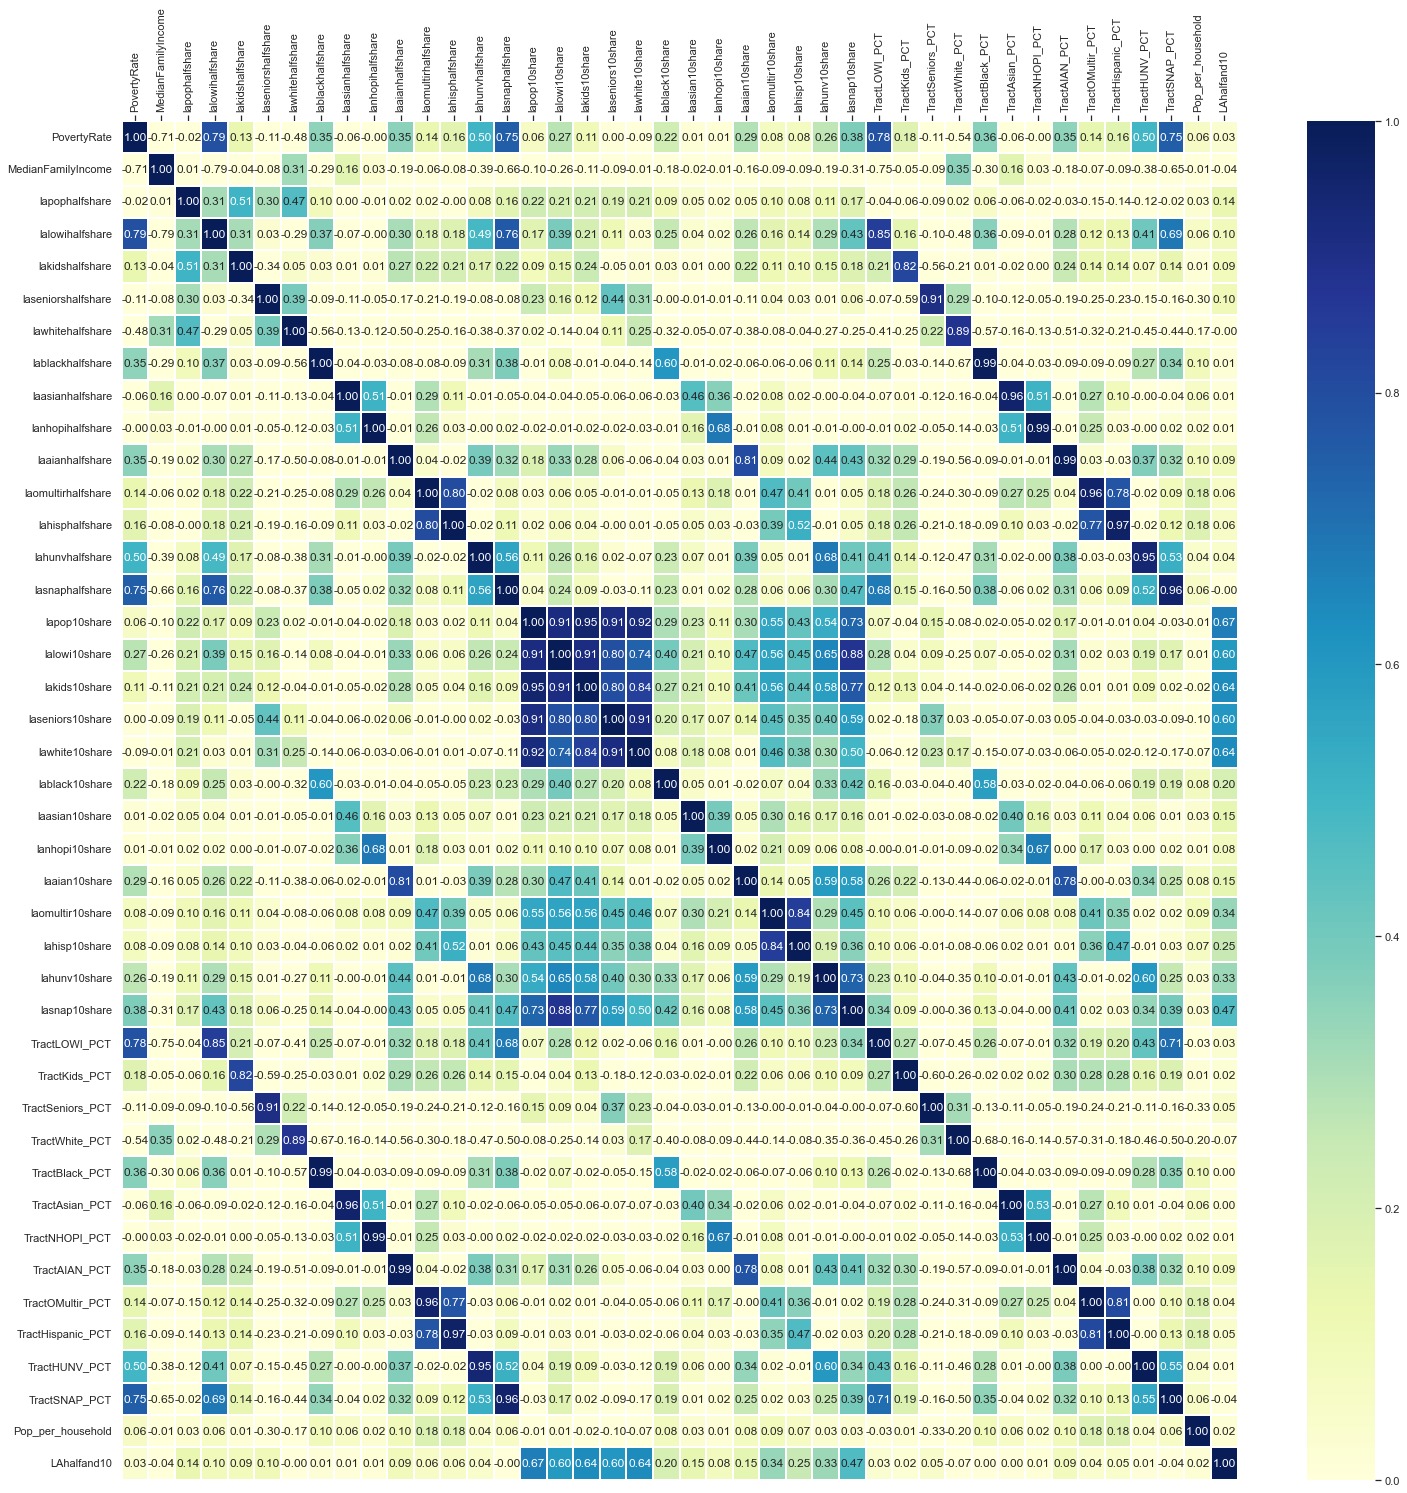

In [24]:
# Check coorelation coefficient of feature in df 
corrM = df2.corr()
  
# Create a heatmap for all parameter correlation values
sns.set(style="white",font_scale=1)
plt.figure(figsize = (25,25))
ax=sns.heatmap(corrM, cmap="YlGnBu", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [25]:
# Define features and target
X = df2.drop('LAhalfand10', axis=1)
y = df2['LAhalfand10']

# Scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Optimization

## Feature Selection

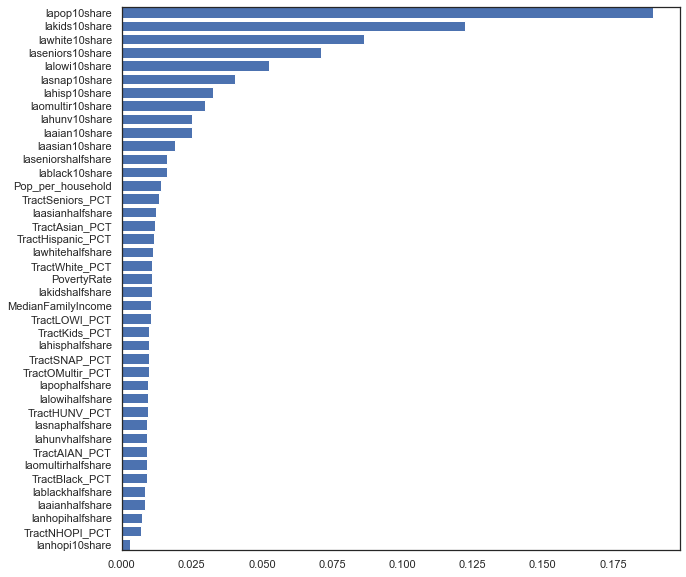

In [26]:
# Create Random Forest Classifier model
clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [27]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1000
           1       0.91      0.86      0.89       927

    accuracy                           0.89      1927
   macro avg       0.90      0.89      0.89      1927
weighted avg       0.90      0.89      0.89      1927

Training Score: 0.984604739664418
Testing Score: 0.8946549039958485


## Hyperparameter Tuning with GridSearchCV

In [28]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [1, 3, 5],
    'n_estimators': [50, 100, 200]
}

# Create a base model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [29]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')


{'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1000
           1       0.92      0.87      0.89       927

    accuracy                           0.90      1927
   macro avg       0.90      0.90      0.90      1927
weighted avg       0.90      0.90      0.90      1927

Training Score: 0.8936170212765957
Testing Score: 0.8972496107939802


# Random Forest Classifier with Third DataFrame (67,286 rows)
* This dataframe was created by adding 13 more features to first dataframe (as part of model optimization) and resulted into an increase of 721,854 datapoints.

## Load Data

In [30]:
# Third dataframe
df3 = pd.read_sql_query('select * from food_access_3', engine)
df3.tail()

CensusTract StateFIPS    State           County  Urban  Pop2010  \
67281  56043000200        56  Wyoming  Washakie County      0     3326   
67282  56043000301        56  Wyoming  Washakie County      1     2665   
67283  56043000302        56  Wyoming  Washakie County      1     2542   
67284  56045951100        56  Wyoming    Weston County      0     3314   
67285  56045951300        56  Wyoming    Weston County      1     3894   

       OHU2010  PovertyRate  MedianFamilyIncome  LAhalfand10  ...  \
67281     1317          9.7             67254.0            1  ...   
67282     1154         11.6             64152.0            1  ...   
67283     1021         16.3             69605.0            1  ...   
67284     1322         17.5             74500.0            1  ...   
67285     1699         17.3             76838.0            1  ...   

       TractSeniors_PCT  TractWhite_PCT  TractBlack_PCT  TractAsian_PCT  \
67281             17.83           93.39            0.18            0.45   
67282             14.97           89.19            0.19            0.86   
67283             20.30           90.95            0.43            0.39   
67284             15.06           95.93            0.45            0.30   
67285             16.69           95.17            0.15            0.26   

       TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  TractHispanic_PCT  \
67281            0.00           0.81              5.17               9.29   
67282            0.00           1.50              8.26              16.74   
67283            0.04           1.02              7.16              16.01   
67284            0.03           1.42              1.87               2.75   
67285            0.05           1.13              3.24               3.21   

       TractHUNV_PCT  TractSNAP_PCT  
67281           4.63           4.86  
67282           7.63           3.55  
67283           2.25           6.27  
67284           3.56           2.57  
67285           2.00           6.47  

[5 rows x 47 columns]

## Preprocess Data

In [31]:
# Calculate population / # of households in order to create a new column
df3['Pop_per_household'] = df3['Pop2010']/df3['OHU2010']
df3.head()

CensusTract StateFIPS    State          County  Urban  Pop2010  OHU2010  \
0  01001020100        01  Alabama  Autauga County      1     1912      693   
1  01001020200        01  Alabama  Autauga County      1     2170      743   
2  01001020300        01  Alabama  Autauga County      1     3373     1256   
3  01001020400        01  Alabama  Autauga County      1     4386     1722   
4  01001020500        01  Alabama  Autauga County      1    10766     4082   

   PovertyRate  MedianFamilyIncome  LAhalfand10  ...  TractWhite_PCT  \
0         11.3             81250.0            1  ...           84.83   
1         17.9             49000.0            1  ...           40.92   
2         15.0             62609.0            1  ...           76.37   
3          2.8             70607.0            1  ...           93.16   
4         15.2             96334.0            1  ...           80.49   

   TractBlack_PCT  TractAsian_PCT  TractNHOPI_PCT  TractAIAN_PCT  \
0           11.35            0.73            0.00           0.73   
1           56.08            0.23            0.00           0.23   
2           19.18            0.50            0.15           0.33   
3            4.40            0.41            0.09           0.25   
4           13.35            2.75            0.08           0.45   

   TractOMultir_PCT  TractHispanic_PCT  TractHUNV_PCT  TractSNAP_PCT  \
0              2.35               2.30           0.87          14.72   
1              2.53               3.46          11.98          21.00   
2              3.47               2.58           7.88          13.69   
3              1.69               1.94           1.22           5.69   
4              2.88               3.30           5.63           8.30   

   Pop_per_household  
0           2.759019  
1           2.920592  
2           2.685510  
3           2.547038  
4           2.637433  

[5 rows x 48 columns]

In [32]:
# Drop columns that don't contribute to the model
df3= df3.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
df3.head()

PovertyRate  MedianFamilyIncome  LAhalfand10  lapophalfshare  \
0         11.3             81250.0            1          100.00   
1         17.9             49000.0            1          100.00   
2         15.0             62609.0            1           84.70   
3          2.8             70607.0            1           83.24   
4         15.2             96334.0            1           72.25   

   lalowihalfshare  lakidshalfshare  laseniorshalfshare  lawhitehalfshare  \
0            24.42            26.52               11.56             84.83   
1            44.34            27.93                9.86             40.92   
2            28.79            22.86               10.60             64.53   
3            20.36            19.30               17.48             77.41   
4            15.97            21.45                7.80             58.51   

   lablackhalfshare  laasianhalfshare  ...  TractWhite_PCT  TractBlack_PCT  \
0             11.35              0.73  ...           84.83           11.35   
1             56.08              0.23  ...           40.92           56.08   
2             16.43              0.30  ...           76.37           19.18   
3              3.88              0.34  ...           93.16            4.40   
4              9.29              1.94  ...           80.49           13.35   

   TractAsian_PCT  TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  \
0            0.73            0.00           0.73              2.35   
1            0.23            0.00           0.23              2.53   
2            0.50            0.15           0.33              3.47   
3            0.41            0.09           0.25              1.69   
4            2.75            0.08           0.45              2.88   

   TractHispanic_PCT  TractHUNV_PCT  TractSNAP_PCT  Pop_per_household  
0               2.30           0.87          14.72           2.759019  
1               3.46          11.98          21.00           2.920592  
2               2.58           7.88          13.69           2.685510  
3               1.94           1.22           5.69           2.547038  
4               3.30           5.63           8.30           2.637433  

[5 rows x 29 columns]

In [33]:
# Move the target column to the last
cols = list(df3.columns.values)
cols.pop(cols.index('LAhalfand10')) 
df3 = df3[cols+['LAhalfand10']]
df3.head()

PovertyRate  MedianFamilyIncome  lapophalfshare  lalowihalfshare  \
0         11.3             81250.0          100.00            24.42   
1         17.9             49000.0          100.00            44.34   
2         15.0             62609.0           84.70            28.79   
3          2.8             70607.0           83.24            20.36   
4         15.2             96334.0           72.25            15.97   

   lakidshalfshare  laseniorshalfshare  lawhitehalfshare  lablackhalfshare  \
0            26.52               11.56             84.83             11.35   
1            27.93                9.86             40.92             56.08   
2            22.86               10.60             64.53             16.43   
3            19.30               17.48             77.41              3.88   
4            21.45                7.80             58.51              9.29   

   laasianhalfshare  lanhopihalfshare  ...  TractBlack_PCT  TractAsian_PCT  \
0              0.73              0.00  ...           11.35            0.73   
1              0.23              0.00  ...           56.08            0.23   
2              0.30              0.03  ...           19.18            0.50   
3              0.34              0.06  ...            4.40            0.41   
4              1.94              0.05  ...           13.35            2.75   

   TractNHOPI_PCT  TractAIAN_PCT  TractOMultir_PCT  TractHispanic_PCT  \
0            0.00           0.73              2.35               2.30   
1            0.00           0.23              2.53               3.46   
2            0.15           0.33              3.47               2.58   
3            0.09           0.25              1.69               1.94   
4            0.08           0.45              2.88               3.30   

   TractHUNV_PCT  TractSNAP_PCT  Pop_per_household  LAhalfand10  
0           0.87          14.72           2.759019            1  
1          11.98          21.00           2.920592            1  
2           7.88          13.69           2.685510            1  
3           1.22           5.69           2.547038            1  
4           5.63           8.30           2.637433            1  

[5 rows x 29 columns]

In [34]:
# Check for null values
df3.isnull().sum()

PovertyRate           0
MedianFamilyIncome    0
lapophalfshare        0
lalowihalfshare       0
lakidshalfshare       0
laseniorshalfshare    0
lawhitehalfshare      0
lablackhalfshare      0
laasianhalfshare      0
lanhopihalfshare      0
laaianhalfshare       0
laomultirhalfshare    0
lahisphalfshare       0
lahunvhalfshare       0
lasnaphalfshare       0
TractLOWI_PCT         0
TractKids_PCT         0
TractSeniors_PCT      0
TractWhite_PCT        0
TractBlack_PCT        0
TractAsian_PCT        0
TractNHOPI_PCT        0
TractAIAN_PCT         0
TractOMultir_PCT      0
TractHispanic_PCT     0
TractHUNV_PCT         0
TractSNAP_PCT         0
Pop_per_household     0
LAhalfand10           0
dtype: int64

In [35]:
# Check for duplicate values 
df3.duplicated().sum()

0

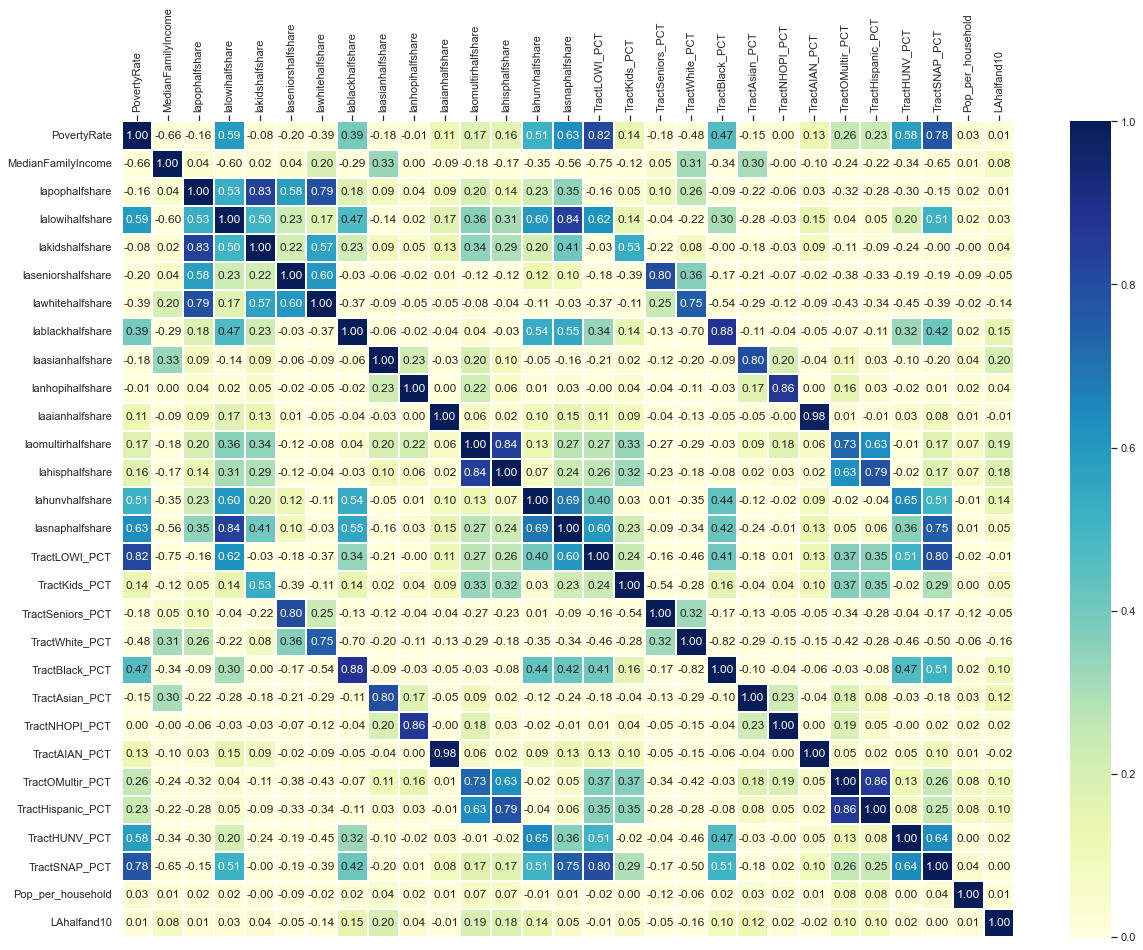

In [36]:
# Check coorelation coefficient of feature in df 
corrM = df3.corr()
  
# Create a heatmap for all parameter correlation values
sns.set(style="white",font_scale=1)
plt.figure(figsize = (20,15))
ax=sns.heatmap(corrM, cmap="YlGnBu", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [37]:
# Define features and target
X = df3.drop('LAhalfand10', axis=1)
y = df3['LAhalfand10']

# Scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testing Various Binary Classification Models: Model, Fit, Predict

In [38]:
# Create models
models = [
    LogisticRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier()
    
]


In [39]:
# Fit and Pedict models
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)       
    print(model)
    print(f'Training Score: {model.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {model.score(X_test_scaled, y_test)}')
    print()   
      

LogisticRegression()
Training Score: 0.7918318008877616
Testing Score: 0.7907502080608727

Lasso()
Training Score: 0.0
Testing Score: -0.00011396489086012984

Ridge()
Training Score: 0.16529671383460065
Testing Score: 0.15977550326061607

ElasticNet()
Training Score: 0.0
Testing Score: -0.00011396489086012984

KNeighborsClassifier()
Training Score: 0.8650324984147115
Testing Score: 0.8085839971465938

GaussianNB()
Training Score: 0.545933734939759
Testing Score: 0.5493401498038283

SVC()
Training Score: 0.8344562460367787
Testing Score: 0.833372963975746

DecisionTreeClassifier()
Training Score: 1.0
Testing Score: 0.785935085007728

AdaBoostClassifier()
Training Score: 0.8276593214965123
Testing Score: 0.8260016644869813

RandomForestClassifier()
Training Score: 0.9999801838934687
Testing Score: 0.844311021281655



In [40]:
# Get the complete score card for RandomForestClassifier model
clf = RandomForestClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.76      0.64      0.70      4620
           1       0.87      0.92      0.90     12202

    accuracy                           0.85     16822
   macro avg       0.81      0.78      0.80     16822
weighted avg       0.84      0.85      0.84     16822

Training Score: 1.0
Testing Score: 0.845202710735941


# Model Optimization

## Feature Selection

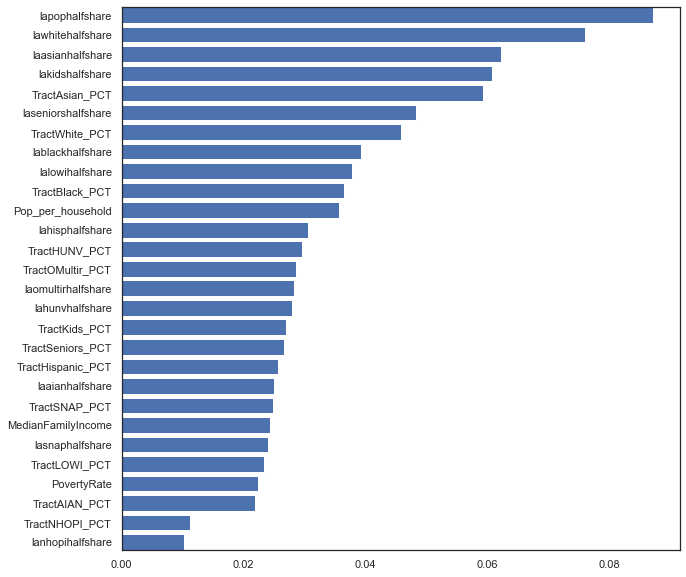

In [41]:
# Create Random Forest Classifier model
clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [42]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.74      0.62      0.68      4615
           1       0.87      0.92      0.89     12207

    accuracy                           0.84     16822
   macro avg       0.80      0.77      0.78     16822
weighted avg       0.83      0.84      0.83     16822

Training Score: 1.0
Testing Score: 0.8366424919747949


## Hyperparameter Tuning with GridSearchCV

In [43]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Create a base model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [44]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')

{'max_depth': 7, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      4615
           1       0.84      0.93      0.88     12207

    accuracy                           0.82     16822
   macro avg       0.79      0.74      0.76     16822
weighted avg       0.82      0.82      0.81     16822

Training Score: 0.8324548192771084
Testing Score: 0.8226132445606943


In [45]:
# Create a visualization for the first tree 
features=df3.columns
target=df3['LAhalfand10'].tolist()

plt.figure(figsize=(30, 20), dpi=400)
tree.plot_tree(grid_clf.best_estimator_[0], filled=True, fontsize=8, feature_names=features, class_names=True)
plt.savefig("img/tree", transparent=True)
plt.show()

# Analysis

We created multiple dataframes (different feature numbers/ rows) from our dataset and used various binary classification models to get the best performing model. Following are the conclusions from our best model (using third dataframe):
* Out of all the binary classification models tested, Random Forest Classifier gave the highest accuracy with overfitting (Training Score: 1.0, Testing Score: 0.84). 
* Feature addition improved model accuracy - third dataframe was created by adding 13 more features to first dataframe and it increased the accuracy from 0.76 to 0.82.
* Feature selection was not helpful in resolving overfitting issue (Training Score: 0.99, Testing Score: 0.83).
* Hyperparameter tuning ('max_depth': 7, 'n_estimators': 200) resolved the overfitting issue (Training Score: 0.83, Testing Score: 0.82) with some decrease in accuracy (0.84 to 0.82)
* Optimized model has a high recall (0.94) for "label 1" (low access population with food insecurity flag) which means our model is highly efficient in predicting true positives for this class (less false negatives). Correct prediction of this flag is important for people to qualify for food assistance benefits. 

* Limitations of first and second dataframes:
    * First dataframe - Even though the number of rows is high (71,782 rows), the accuracy score is pretty low (0.75).
    * Second dataframe - Even though the accuracy is high (.90), the number of rows is suboptimal (7,708 rows) for machine learning.
    